<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Teorema-central-del-límite" data-toc-modified-id="Teorema-central-del-límite-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Teorema central del límite</a></span></li><li><span><a href="#Intervalo-de-confianza-del-95%" data-toc-modified-id="Intervalo-de-confianza-del-95%-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intervalo de confianza del 95%</a></span></li><li><span><a href="#Tests-de-normalidad" data-toc-modified-id="Tests-de-normalidad-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tests de normalidad</a></span></li><li><span><a href="#Datos-reales" data-toc-modified-id="Datos-reales-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Datos reales</a></span></li></ul></div>

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
plt.rcParams['figure.figsize']=(10,10)

In [10]:
stats.norm(10,2).rvs(100).mean()

9.908476630026426

## Teorema central del límite

In [24]:
muestras = [stats.norm(10,2).rvs(100).mean() for _ in range(10000)]

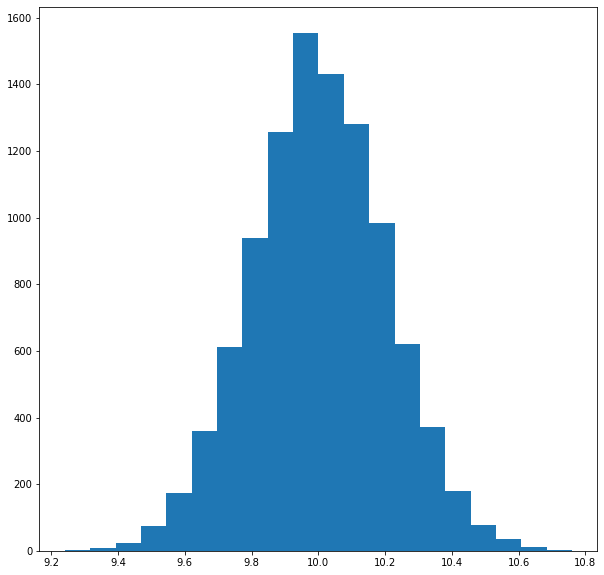

In [17]:
_ = plt.hist(muestras, bins=20)

In [30]:
se = np.std(muestras) / np.sqrt(len(muestras))
se

0.001990650964817155

In [32]:
m = np.mean(muestras)
m

10.001738530633498

## Intervalo de confianza del 95%

In [34]:
cv = stats.norm(0,1).ppf(0.975)

In [35]:
ci = [m-se*cv, m+se*cv]
ci

[9.997836926436666, 10.00564013483033]

## Tests de normalidad

In [38]:
data = stats.norm(10,2).rvs(1000)

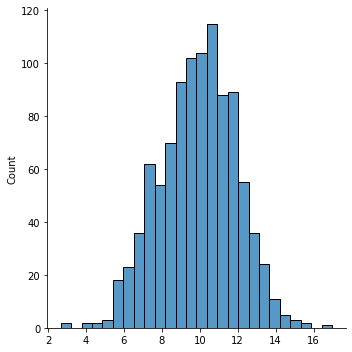

In [39]:
sns.displot(data)

In [40]:
data.mean()

9.899045484243414

In [41]:
data.std()

2.002860820483379

In [46]:
stats.skew(data)

-0.1327057003251366

In [45]:
stats.kurtosis(data)

-0.027643782546257878

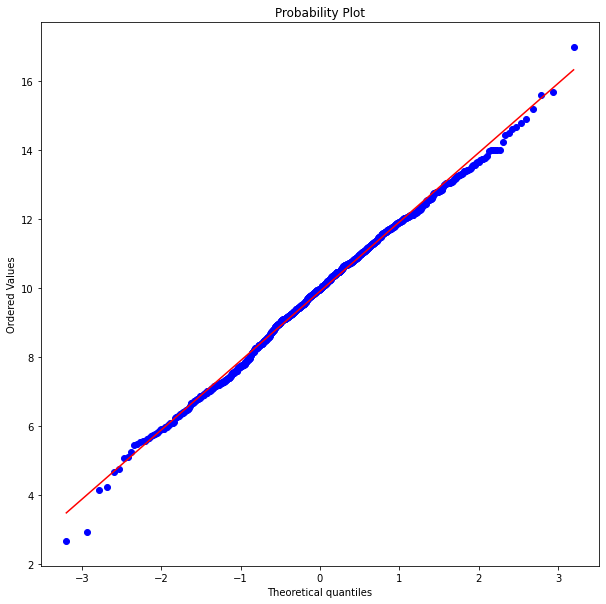

In [57]:
_ = stats.probplot(data, dist='norm', plot=plt)

In [60]:
_, pval = stats.shapiro(data)
if pval < 0.05:
    print('No es normal')

## Datos reales

In [61]:
df = sns.load_dataset('penguins')

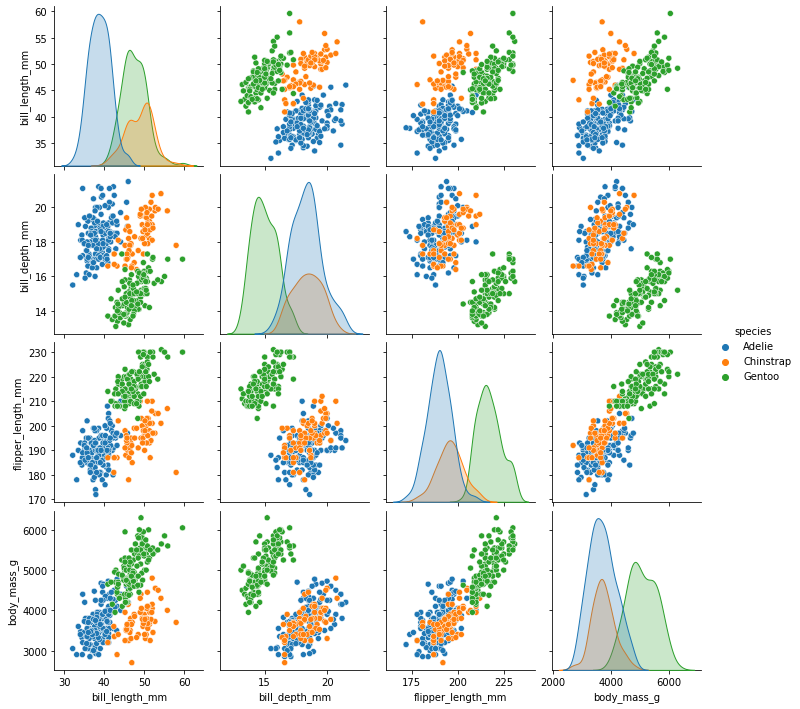

In [64]:
sns.pairplot(df, hue='species')

In [65]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [74]:
df.dropna(inplace=True)

In [83]:
data = df[df.species=='Chinstrap']['flipper_length_mm']

In [76]:
data =  df['flipper_length_mm']

In [77]:
data

0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
338    214.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 333, dtype: float64

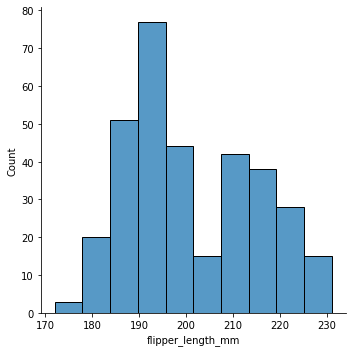

In [79]:
sns.displot(data)

In [100]:
stats.shapiro(data)

ShapiroResult(statistic=0.9889119863510132, pvalue=0.8106710910797119)

In [88]:
stats.anderson(data)

AndersonResult(statistic=0.23260397359308627, critical_values=array([0.547, 0.623, 0.747, 0.871, 1.037]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

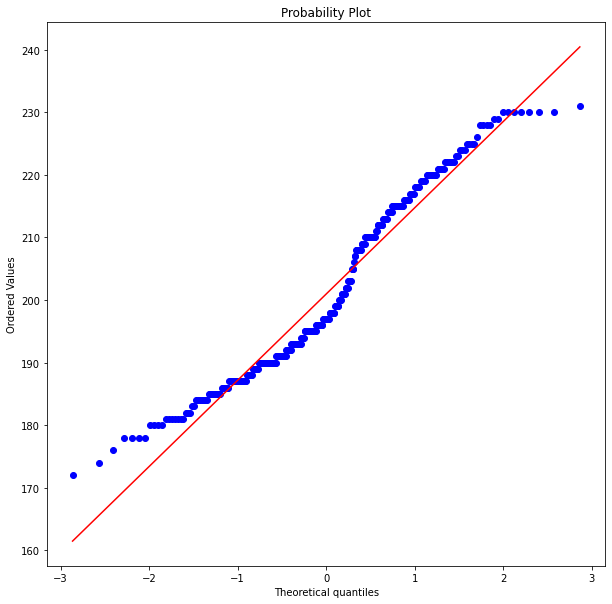

In [82]:
_ = stats.probplot(data, dist='norm', plot=plt)

In [86]:
stats.norm.fit(data)

(195.8235294117647, 7.079259633253841)

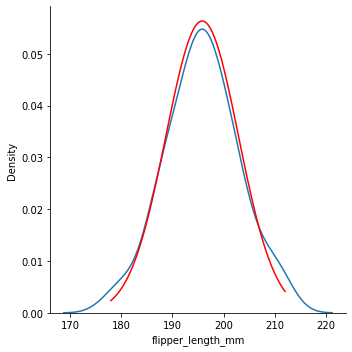

In [99]:
x = np.linspace(min(data), max(data), 100)
sns.displot(data, kind='kde')
plt.plot(x, stats.norm(*stats.norm.fit(data)).pdf(x), c='r')
